#Аналитический отчет проекта "Анализ и автоматическая балансировка портфеля криптовалют на основе статистического анализа"

## Структура отчета



1.   Описание задания
2.   Подключение и импорт данных
3. Преобразование данных
4. Анализ данных
5. Разработка модели

## Описание задания

### Задачи проекта

1. Провести исследование и
описать методики расчета
корреляции между
криптовалютами с использованием исторических
данных.
2. Разработать методику оценки
сбалансированности
криптовалютного портфеля на
основе коэффициентов
корреляции и других
статистических показателей.
3. Подготовить примеры
сбалансированного и
несбалансированного
криптовалютного портфеля с
обоснованием причин их
эффективности или
неэффективности.
4. Предложить, обосновать и
реализовать алгоритм
автоматического расчета
обменных операций для
балансировки криптовалютного
портфеля.
5. Реализовать алгоритм анализа
данных и балансировки
портфеля на языке
программирования Python с
использованием библиотек
анализа данных.
6. Подготовить аналитический
отчет и расчеты с
демонстрацией работы
разработанного алгоритма.

### Требования к результату
Результатом работы является
аналитический отчет,
содержащий теоретическое
описание методов и алгоритма
балансировки криптовалютного
портфеля, а также практическая
реализация в виде интерактивного
Jupyter Notebook на Python,
демонстрирующего расчёты и
работу алгоритма на примерах
реальных данных.

### Формат отчетности
1. Аналитический отчет в
текстовом виде.
2. Jupyter Notebook с исходными
кодами и демонстрацией
работы алгоритмов.

##Подключение и импорт

Скрипт, необходимый для объединения табличных данных по всем исследуемым валютам

In [ ]:
import pandas as pd
import glob
import os

folder_path = 'валюты'

csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

dfs = []

min_time = pd.Timestamp('2024-04-12T23:59:59.999Z')
max_time = pd.Timestamp('2025-04-12T23:59:59.999Z')

for file in csv_files:
    df = pd.read_csv(file, sep=';')
    coin_name = os.path.basename(file).split('_13')[0]

    df['coin_name'] = coin_name
    df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)

    df_filtered = df[(df['timestamp'] >= min_time) & (df['timestamp'] <= max_time)]
    dfs.append(df_filtered)

df_final = pd.concat(dfs, ignore_index=True)

In [ ]:
df_final

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp,coin_name
0,2025-04-12T00:00:00.000Z,2025-04-12T23:59:59.999Z,2025-04-12T21:54:00.000Z,2025-04-12T01:35:00.000Z,2806,1308.377736,1395.367547,1262.767567,1355.954595,1.016266e+10,4.530671e+11,2025-04-12 23:59:59.999000+00:00,Hyperliquid
1,2025-04-11T00:00:00.000Z,2025-04-11T23:59:59.999Z,2025-04-11T20:54:00.000Z,2025-04-11T01:04:00.000Z,2806,1187.720666,1330.215254,1152.880597,1308.377736,1.259961e+10,4.383489e+11,2025-04-11 23:59:59.999000+00:00,Hyperliquid
2,2025-04-10T00:00:00.000Z,2025-04-10T23:59:59.999Z,2025-04-10T23:12:00.000Z,2025-04-10T16:08:00.000Z,2806,1168.477164,1205.910462,1116.328983,1187.720666,1.278970e+10,4.091783e+11,2025-04-10 23:59:59.999000+00:00,Hyperliquid
3,2025-04-09T00:00:00.000Z,2025-04-09T23:59:59.999Z,2025-04-09T18:01:00.000Z,2025-04-09T00:09:00.000Z,2806,963.120470,1228.190484,955.668932,1168.477164,2.274289e+10,3.888248e+11,2025-04-09 23:59:59.999000+00:00,Hyperliquid
4,2025-04-08T00:00:00.000Z,2025-04-08T23:59:59.999Z,2025-04-08T02:43:00.000Z,2025-04-08T17:36:00.000Z,2806,984.824551,1080.108039,924.556416,963.120470,1.332341e+10,3.226987e+11,2025-04-08 23:59:59.999000+00:00,Hyperliquid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33677,2024-04-16T00:00:00.000Z,2024-04-16T23:59:59.999Z,2024-04-16T08:05:00.000Z,2024-04-16T12:30:00.000Z,2806,93.526487,94.219513,93.490805,94.219513,8.506000e+09,2.207008e+11,2024-04-16 23:59:59.999000+00:00,Ethena USDe
33678,2024-04-15T00:00:00.000Z,2024-04-15T23:59:59.999Z,2024-04-15T07:48:00.000Z,2024-04-15T01:19:00.000Z,2806,93.304779,93.927819,93.281907,93.526487,8.226327e+09,2.201882e+11,2024-04-15 23:59:59.999000+00:00,Ethena USDe
33679,2024-04-14T00:00:00.000Z,2024-04-14T23:59:59.999Z,2024-04-14T17:13:00.000Z,2024-04-14T05:13:00.000Z,2806,93.294749,93.359177,93.175555,93.274784,1.408365e+10,2.200833e+11,2024-04-14 23:59:59.999000+00:00,Ethena USDe
33680,2024-04-13T00:00:00.000Z,2024-04-13T23:59:59.999Z,2024-04-13T05:54:00.000Z,2024-04-13T21:31:00.000Z,2806,93.324071,93.470496,93.124212,93.294749,1.864390e+10,2.219301e+11,2024-04-13 23:59:59.999000+00:00,Ethena USDe


Так как для рассчета корреляции между криптовалютами необходим текущий курс, а в используемом датасете имеется только курс на начало и конец торгов, то было принято решение посчитать типичную цену (TP - Typical Price), которая позволит отразить примерную стоимость валюты.

Такой подход лучше чем среднее (например, между ценой открытия и закрытия), так как TP учитывает эксремумы и всплески валюты на протяжении всего периода торгов. Рассчитывается TP как TP=(H+L+C)/3, где:

* H - максимальная цена
* L - минимальная цена
* C - цена закрытия​

Цена открытия не учитывается, так как она отражает баланс спроса и предложения начала дня, однако в течение дня рынок получает новую информацию и корректирует ожидания.


https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/typical-price

https://help.ctrader.com/knowledge-base/indicators/other/typical-price/#summary



In [ ]:
df_final['current_exchange_rate'] = df_final[['close', 'high', 'low']].mean(axis=1)

In [ ]:
df_final.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp,coin_name,current_exchange_rate
0,2025-04-12T00:00:00.000Z,2025-04-12T23:59:59.999Z,2025-04-12T21:54:00.000Z,2025-04-12T01:35:00.000Z,2806,1308.377736,1395.367547,1262.767567,1355.954595,1.016266e+10,4.530671e+11,2025-04-12 23:59:59.999000+00:00,Hyperliquid,1338.029903
1,2025-04-11T00:00:00.000Z,2025-04-11T23:59:59.999Z,2025-04-11T20:54:00.000Z,2025-04-11T01:04:00.000Z,2806,1187.720666,1330.215254,1152.880597,1308.377736,1.259961e+10,4.383489e+11,2025-04-11 23:59:59.999000+00:00,Hyperliquid,1263.824529
2,2025-04-10T00:00:00.000Z,2025-04-10T23:59:59.999Z,2025-04-10T23:12:00.000Z,2025-04-10T16:08:00.000Z,2806,1168.477164,1205.910462,1116.328983,1187.720666,1.278970e+10,4.091783e+11,2025-04-10 23:59:59.999000+00:00,Hyperliquid,1169.986704
3,2025-04-09T00:00:00.000Z,2025-04-09T23:59:59.999Z,2025-04-09T18:01:00.000Z,2025-04-09T00:09:00.000Z,2806,963.120470,1228.190484,955.668932,1168.477164,2.274289e+10,3.888248e+11,2025-04-09 23:59:59.999000+00:00,Hyperliquid,1117.445527
4,2025-04-08T00:00:00.000Z,2025-04-08T23:59:59.999Z,2025-04-08T02:43:00.000Z,2025-04-08T17:36:00.000Z,2806,984.824551,1080.108039,924.556416,963.120470,1.332341e+10,3.226987e+11,2025-04-08 23:59:59.999000+00:00,Hyperliquid,989.261642


In [ ]:
df_final.to_csv('df_final.csv', index=False)

## Преобразование данных

In [ ]:
df_final = pd.read_csv('df_final.csv')
df_final.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp,coin_name,current_exchange_rate
0,2025-04-12T00:00:00.000Z,2025-04-12T23:59:59.999Z,2025-04-12T21:54:00.000Z,2025-04-12T01:35:00.000Z,2806,1308.377736,1395.367547,1262.767567,1355.954595,1.016266e+10,4.530671e+11,2025-04-12 23:59:59.999000+00:00,Hyperliquid,1338.029903
1,2025-04-11T00:00:00.000Z,2025-04-11T23:59:59.999Z,2025-04-11T20:54:00.000Z,2025-04-11T01:04:00.000Z,2806,1187.720666,1330.215254,1152.880597,1308.377736,1.259961e+10,4.383489e+11,2025-04-11 23:59:59.999000+00:00,Hyperliquid,1263.824529
2,2025-04-10T00:00:00.000Z,2025-04-10T23:59:59.999Z,2025-04-10T23:12:00.000Z,2025-04-10T16:08:00.000Z,2806,1168.477164,1205.910462,1116.328983,1187.720666,1.278970e+10,4.091783e+11,2025-04-10 23:59:59.999000+00:00,Hyperliquid,1169.986704
3,2025-04-09T00:00:00.000Z,2025-04-09T23:59:59.999Z,2025-04-09T18:01:00.000Z,2025-04-09T00:09:00.000Z,2806,963.120470,1228.190484,955.668932,1168.477164,2.274289e+10,3.888248e+11,2025-04-09 23:59:59.999000+00:00,Hyperliquid,1117.445527
4,2025-04-08T00:00:00.000Z,2025-04-08T23:59:59.999Z,2025-04-08T02:43:00.000Z,2025-04-08T17:36:00.000Z,2806,984.824551,1080.108039,924.556416,963.120470,1.332341e+10,3.226987e+11,2025-04-08 23:59:59.999000+00:00,Hyperliquid,989.261642


количество записей до фильтрации

In [ ]:
df_final.shape

(33682, 14)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33682 entries, 0 to 33681
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timeOpen               33682 non-null  object 
 1   timeClose              33682 non-null  object 
 2   timeHigh               33682 non-null  object 
 3   timeLow                33682 non-null  object 
 4   name                   33682 non-null  int64  
 5   open                   33682 non-null  float64
 6   high                   33682 non-null  float64
 7   low                    33682 non-null  float64
 8   close                  33682 non-null  float64
 9   volume                 33682 non-null  float64
 10  marketCap              33682 non-null  float64
 11  timestamp              33682 non-null  object 
 12  coin_name              33682 non-null  object 
 13  current_exchange_rate  33682 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 3.6+ 

оставляем только те валюты, у которых есть записи за весь год

In [ ]:
value_counts = df_final['coin_name'].value_counts()
currencies_with_360_entries = value_counts[value_counts == 366].index.tolist()
df_final = df_final[df_final['coin_name'].isin(currencies_with_360_entries)]

количество записей после фильтрации

In [ ]:
df_final.shape

(32940, 14)

Теперь необходимо преобразовать вид таблицы, а именно - пренести записи о каждой валюте из вертикального формата в горизонтальный с добавлением новых колонок по каждой конкретной валюте. Это нужно для анализа корреляции за конкретные временные промежутки всех валют, так как анализ идет построчно.


Также удалим ненужные столбцы, которые не несут информативности и/или дублируют уже существующие, оставим только информацию о current_exchange_rate ля рассчета корреляции. В качестве соединения будет использоваться столбец timestamp.

In [ ]:
df_final = df_final.drop(columns=['name', 'timeOpen', 'timeClose', 'open', 'close', 'low', 'high', 'volume', 'marketCap' ])

df_final['timestamp'] = pd.to_datetime(df_final['timestamp'])

df_pivot = df_final.pivot_table(index='timestamp',
                                 columns='coin_name',
                                 values=['current_exchange_rate'],
                                 aggfunc='first')

df_pivot.columns = [f"{metric}_{coin}" for metric, coin in df_pivot.columns]

df_pivot.reset_index(inplace=True)

In [ ]:
df_pivot

,timestamp,current_exchange_rate_AB,current_exchange_rate_Aave,current_exchange_rate_Algorand,current_exchange_rate_Aptos,current_exchange_rate_Arbitrum,current_exchange_rate_Artificial Superintelligence Alliance,current_exchange_rate_Avalanche,current_exchange_rate_BNB,current_exchange_rate_BitTorrent [New],...,current_exchange_rate_The Graph,current_exchange_rate_The Sandbox,current_exchange_rate_Theta Network,current_exchange_rate_UNUS SED LEO,current_exchange_rate_USDC,current_exchange_rate_Uniswap,current_exchange_rate_VeChain,current_exchange_rate_Worldcoin,current_exchange_rate_XDC Network,current_exchange_rate_XRP
0,2024-04-12 23:59:59.999000+00:00,0.009935,9742.083719,18.855376,961.108062,113.982563,206.773609,3811.411490,55982.021953,0.000139,...,25.719985,50.760943,243.165939,540.705921,93.323523,757.720846,4.213696,531.299061,3.776791,52.354398
1,2024-04-13 23:59:59.999000+00:00,0.008989,7939.501835,15.886698,834.898699,96.995402,181.581782,3211.114665,51996.400658,0.000122,...,22.193878,40.335713,191.836288,542.473103,93.344954,649.570081,3.825243,427.995033,3.496725,45.520561
2,2024-04-14 23:59:59.999000+00:00,0.008164,8008.896868,16.291773,864.874021,104.960282,197.241553,3359.368333,52092.640906,0.000121,...,23.215711,40.203513,194.000497,553.143998,93.340202,677.238004,3.862754,455.474245,3.449345,45.991955
3,2024-04-15 23:59:59.999000+00:00,0.009016,8026.243195,16.314195,870.272403,110.349801,200.721087,3365.928257,52549.427554,0.000122,...,24.506530,41.026710,195.201194,552.614328,93.456568,692.863953,4.012079,451.300848,3.541809,46.782340
4,2024-04-16 23:59:59.999000+00:00,0.008900,8028.739312,16.308477,854.072645,107.203126,193.618169,3243.082673,50677.817278,0.000118,...,23.845387,40.398397,188.486437,552.334592,93.925161,668.042104,3.736103,465.344935,3.529047,46.207694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2025-04-08 23:59:59.999000+00:00,0.965563,11020.401061,13.764111,382.375483,23.132093,33.198561,1424.078683,47746.480322,0.000049,...,6.310639,20.271032,60.280828,771.096521,85.916893,423.083690,1.730892,54.314894,5.515670,158.801992
362,2025-04-09 23:59:59.999000+00:00,0.850215,11706.999979,14.751580,394.235850,24.383231,35.909446,1517.471416,48846.882339,0.000051,...,6.614594,21.343765,63.354219,796.449939,86.042846,443.740843,1.832262,57.798108,5.668721,168.219440
363,2025-04-10 23:59:59.999000+00:00,0.879347,11402.009641,14.907066,390.048393,24.176232,35.949296,1537.264318,48772.779379,0.000050,...,6.537802,21.579385,62.300417,794.176286,84.357036,432.223776,1.810560,59.126361,5.531972,168.076230
364,2025-04-11 23:59:59.999000+00:00,1.069237,11303.207500,15.133955,396.235780,24.414598,36.623355,1583.750529,48653.046098,0.000050,...,6.551750,21.679148,61.290159,785.813957,83.379659,431.847538,1.824029,60.602315,5.803130,167.648551


In [ ]:
df_pivot['timestamp'] = df_pivot['timestamp'].dt.date
df_pivot.head(1)

,timestamp,current_exchange_rate_AB,current_exchange_rate_Aave,current_exchange_rate_Algorand,current_exchange_rate_Aptos,current_exchange_rate_Arbitrum,current_exchange_rate_Artificial Superintelligence Alliance,current_exchange_rate_Avalanche,current_exchange_rate_BNB,current_exchange_rate_BitTorrent [New],...,current_exchange_rate_The Graph,current_exchange_rate_The Sandbox,current_exchange_rate_Theta Network,current_exchange_rate_UNUS SED LEO,current_exchange_rate_USDC,current_exchange_rate_Uniswap,current_exchange_rate_VeChain,current_exchange_rate_Worldcoin,current_exchange_rate_XDC Network,current_exchange_rate_XRP
0,2024-04-12,0.009935,9742.083719,18.855376,961.108062,113.982563,206.773609,3811.41149,55982.021953,0.000139,...,25.719985,50.760943,243.165939,540.705921,93.323523,757.720846,4.213696,531.299061,3.776791,52.354398


Дополнительная проверка на дубликаты и пропуски

In [ ]:
print('Количество пропусков: ', df_pivot.isnull().sum().sum())
print('Количество дубликатов: ', df_pivot.duplicated().sum())

Количество пропусков:  0
Количество дубликатов:  0


In [ ]:
df_pivot.to_csv('df_pivot.csv', index=False)

## Анализ данных

In [ ]:
df_pivot = pd.read_csv('df_pivot.csv')
df_pivot

,timestamp,current_exchange_rate_AB,current_exchange_rate_Aave,current_exchange_rate_Algorand,current_exchange_rate_Aptos,current_exchange_rate_Arbitrum,current_exchange_rate_Artificial Superintelligence Alliance,current_exchange_rate_Avalanche,current_exchange_rate_BNB,current_exchange_rate_BitTorrent [New],...,current_exchange_rate_The Graph,current_exchange_rate_The Sandbox,current_exchange_rate_Theta Network,current_exchange_rate_UNUS SED LEO,current_exchange_rate_USDC,current_exchange_rate_Uniswap,current_exchange_rate_VeChain,current_exchange_rate_Worldcoin,current_exchange_rate_XDC Network,current_exchange_rate_XRP
0,2024-04-12,0.009935,9742.083719,18.855376,961.108062,113.982563,206.773609,3811.411490,55982.021953,0.000139,...,25.719985,50.760943,243.165939,540.705921,93.323523,757.720846,4.213696,531.299061,3.776791,52.354398
1,2024-04-13,0.008989,7939.501835,15.886698,834.898699,96.995402,181.581782,3211.114665,51996.400658,0.000122,...,22.193878,40.335713,191.836288,542.473103,93.344954,649.570081,3.825243,427.995033,3.496725,45.520561
2,2024-04-14,0.008164,8008.896868,16.291773,864.874021,104.960282,197.241553,3359.368333,52092.640906,0.000121,...,23.215711,40.203513,194.000497,553.143998,93.340202,677.238004,3.862754,455.474245,3.449345,45.991955
3,2024-04-15,0.009016,8026.243195,16.314195,870.272403,110.349801,200.721087,3365.928257,52549.427554,0.000122,...,24.506530,41.026710,195.201194,552.614328,93.456568,692.863953,4.012079,451.300848,3.541809,46.782340
4,2024-04-16,0.008900,8028.739312,16.308477,854.072645,107.203126,193.618169,3243.082673,50677.817278,0.000118,...,23.845387,40.398397,188.486437,552.334592,93.925161,668.042104,3.736103,465.344935,3.529047,46.207694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2025-04-08,0.965563,11020.401061,13.764111,382.375483,23.132093,33.198561,1424.078683,47746.480322,0.000049,...,6.310639,20.271032,60.280828,771.096521,85.916893,423.083690,1.730892,54.314894,5.515670,158.801992
362,2025-04-09,0.850215,11706.999979,14.751580,394.235850,24.383231,35.909446,1517.471416,48846.882339,0.000051,...,6.614594,21.343765,63.354219,796.449939,86.042846,443.740843,1.832262,57.798108,5.668721,168.219440
363,2025-04-10,0.879347,11402.009641,14.907066,390.048393,24.176232,35.949296,1537.264318,48772.779379,0.000050,...,6.537802,21.579385,62.300417,794.176286,84.357036,432.223776,1.810560,59.126361,5.531972,168.076230
364,2025-04-11,1.069237,11303.207500,15.133955,396.235780,24.414598,36.623355,1583.750529,48653.046098,0.000050,...,6.551750,21.679148,61.290159,785.813957,83.379659,431.847538,1.824029,60.602315,5.803130,167.648551


In [ ]:
print('анализируемый период: ', df_pivot['timestamp'].min(), df_pivot['timestamp'].max())

анализируемый период:  2024-04-12 2025-04-12


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Будем исследовать корреляцию на разных временных промежутках: год, полгода, три месяца, месяц, неделя

In [ ]:
df_pivot.set_index('timestamp', inplace=True)

intervals = {
    '1_year': ('2024-04-12', '2025-04-12'),
    '6_months': ('2024-10-12', '2025-04-12'),
    '3_months': ('2025-01-12', '2025-04-12'),
    '1_month': ('2025-03-12', '2025-04-12'),
    '1_week': ('2025-04-05', '2025-04-12')
}


=== Интервал: 1_year ===


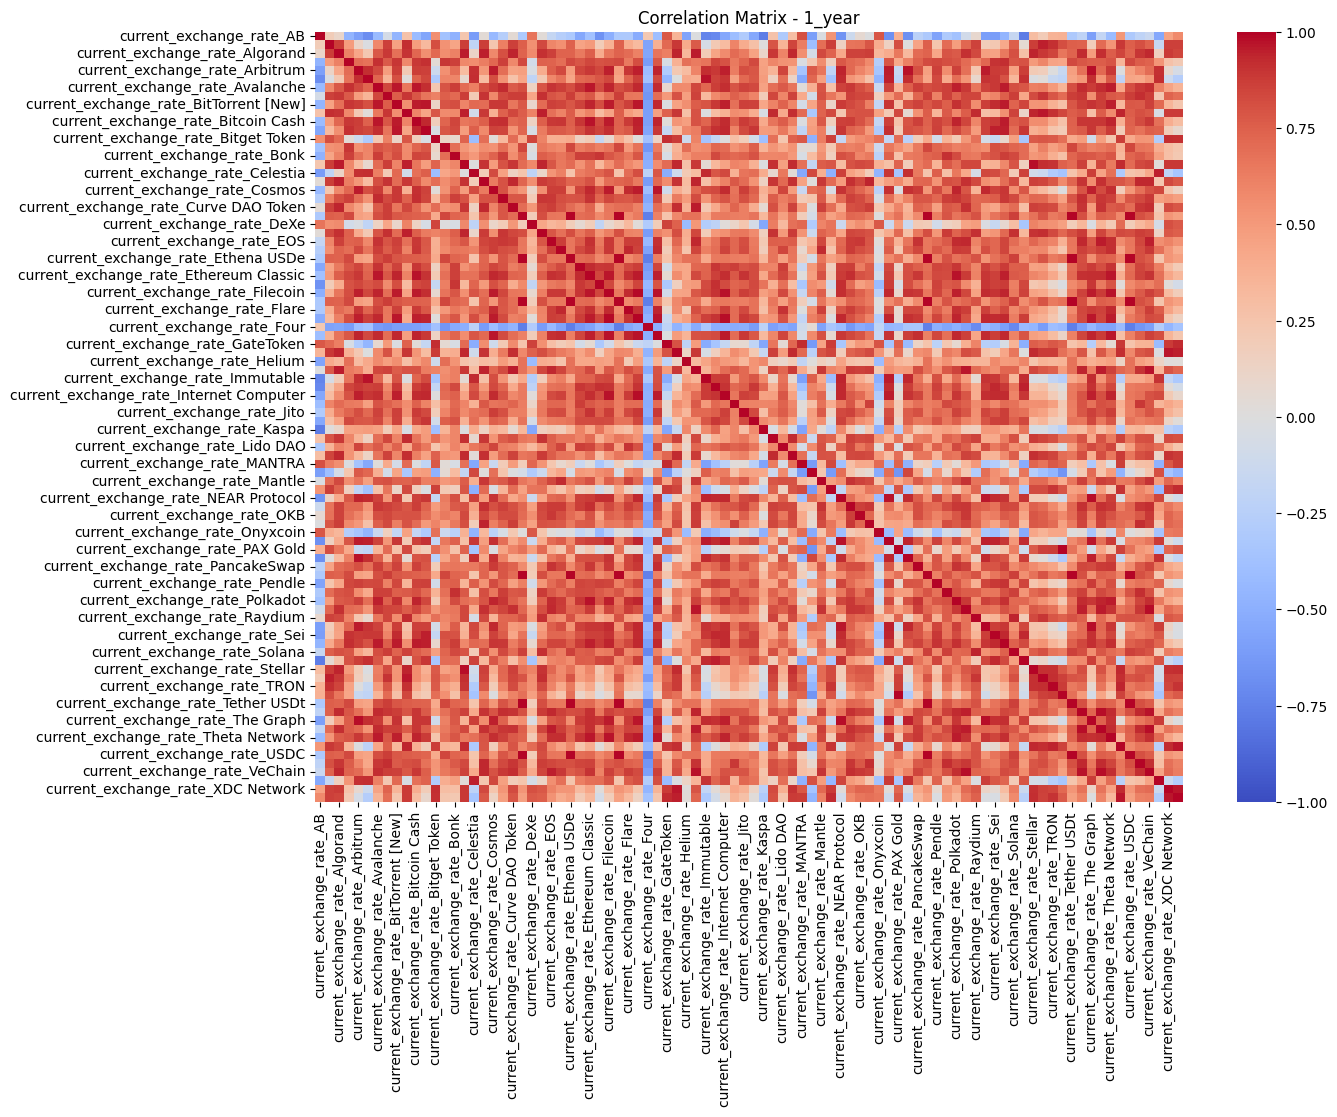


Валютные пары с высокой прямой корреляцией (значение ≥ 0.8):  1052
Для примера выведены первые 20 пар
current_exchange_rate_Tether USDt ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_PayPal USD: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_Tether USDt: корреляция = 1.00
current_exchange_rate_PayPal USD ↔ current_exchange_rate_Tether USDt: корреляция = 1.00
current_exchange_rate_PayPal USD ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_Ethena USDe ↔ current_exchange_rate_Tether USDt: корреляция = 1.00
current_exchange_rate_Ethena USDe ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_Ethena USDe: корреляция = 1.00
current_exchange_rate_Ethena USDe ↔ current_exchange_rate_PayPal USD: корреляция = 1.00
current_exchange_rate_First Digital USD ↔ current_exchange_rate_Tether 

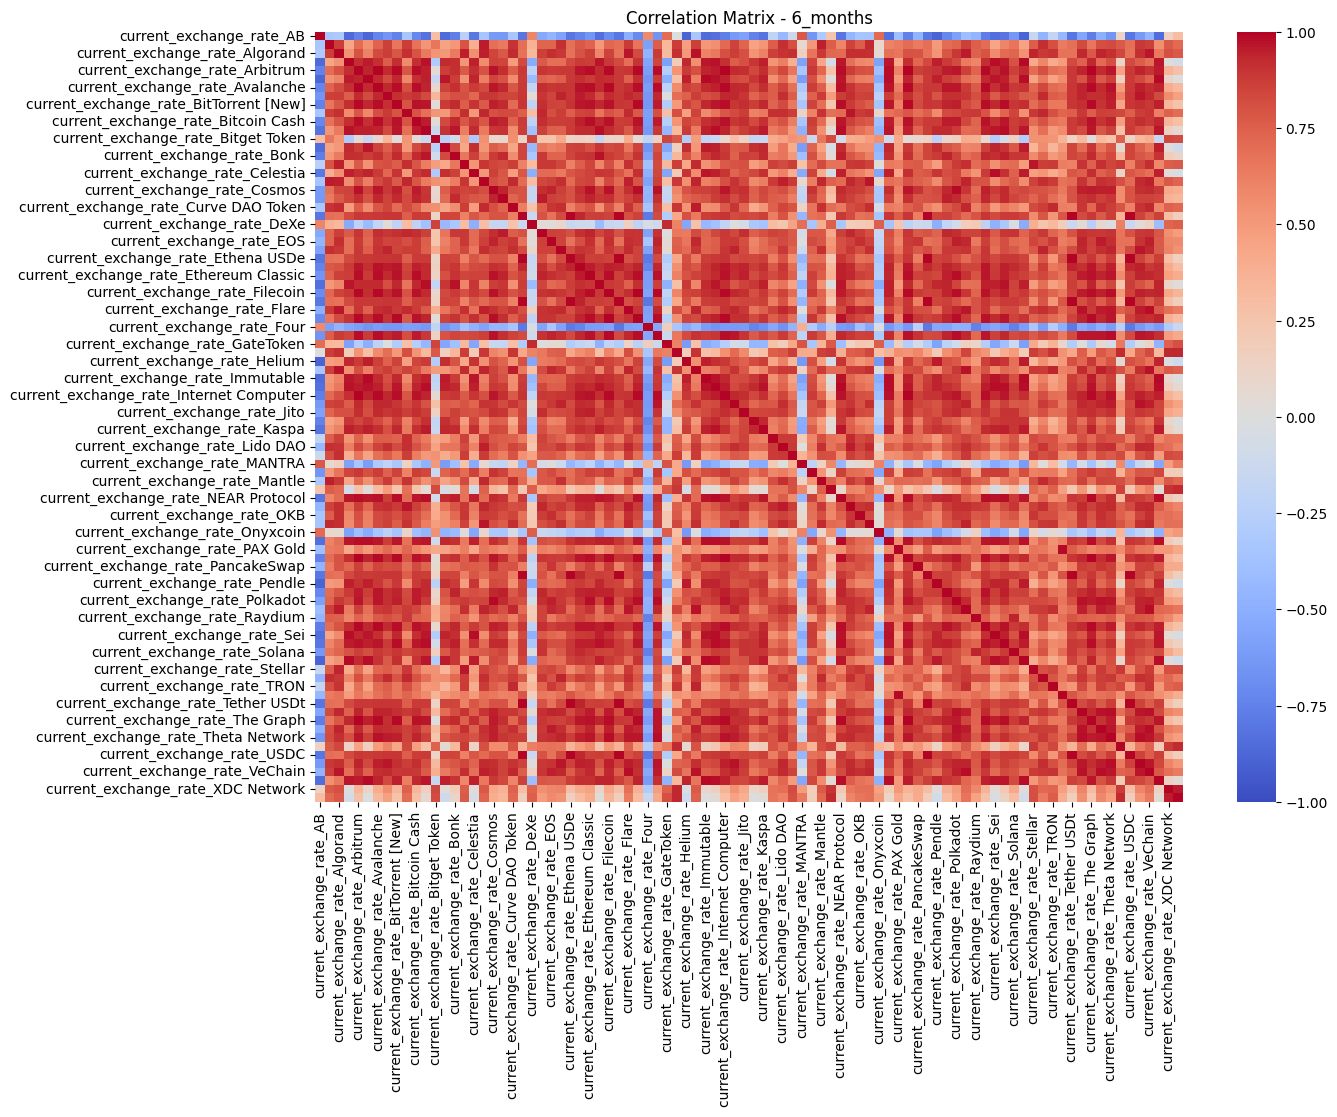


Валютные пары с высокой прямой корреляцией (значение ≥ 0.8):  1878
Для примера выведены первые 20 пар
current_exchange_rate_PayPal USD ↔ current_exchange_rate_Tether USDt: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_PayPal USD: корреляция = 1.00
current_exchange_rate_Tether USDt ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_PayPal USD ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_Tether USDt: корреляция = 1.00
current_exchange_rate_Ethena USDe ↔ current_exchange_rate_Tether USDt: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_Ethena USDe ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_Ethena USDe ↔ current_exchange_rate_PayPal USD: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_Ethena USDe: корреляция = 1.00
current_exchange_rate_First Digital USD ↔ current_exchange_rate_Tether 

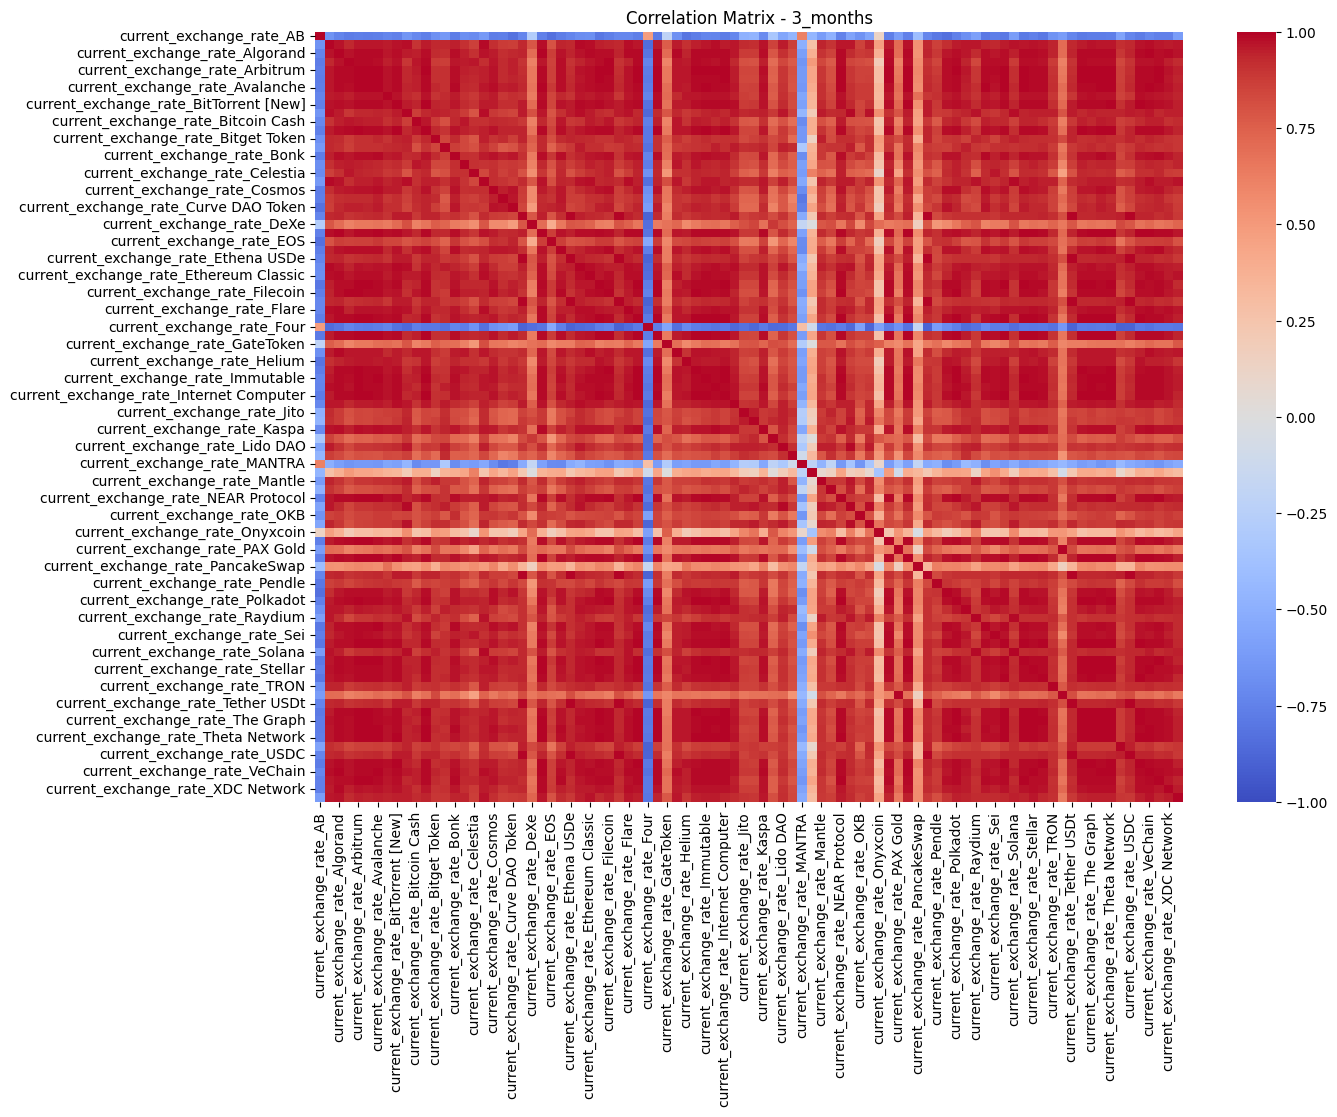


Валютные пары с высокой прямой корреляцией (значение ≥ 0.8):  3020
Для примера выведены первые 20 пар
current_exchange_rate_Tether USDt ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_PayPal USD ↔ current_exchange_rate_Tether USDt: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_PayPal USD: корреляция = 1.00
current_exchange_rate_PayPal USD ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_Ethena USDe ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_Tether USDt: корреляция = 1.00
current_exchange_rate_Ethena USDe ↔ current_exchange_rate_Tether USDt: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_Ethena USDe: корреляция = 1.00
current_exchange_rate_Ethena USDe ↔ current_exchange_rate_PayPal USD: корреляция = 1.00
current_exchange_rate_First Digital USD ↔ current_exchange_rate_Tether 

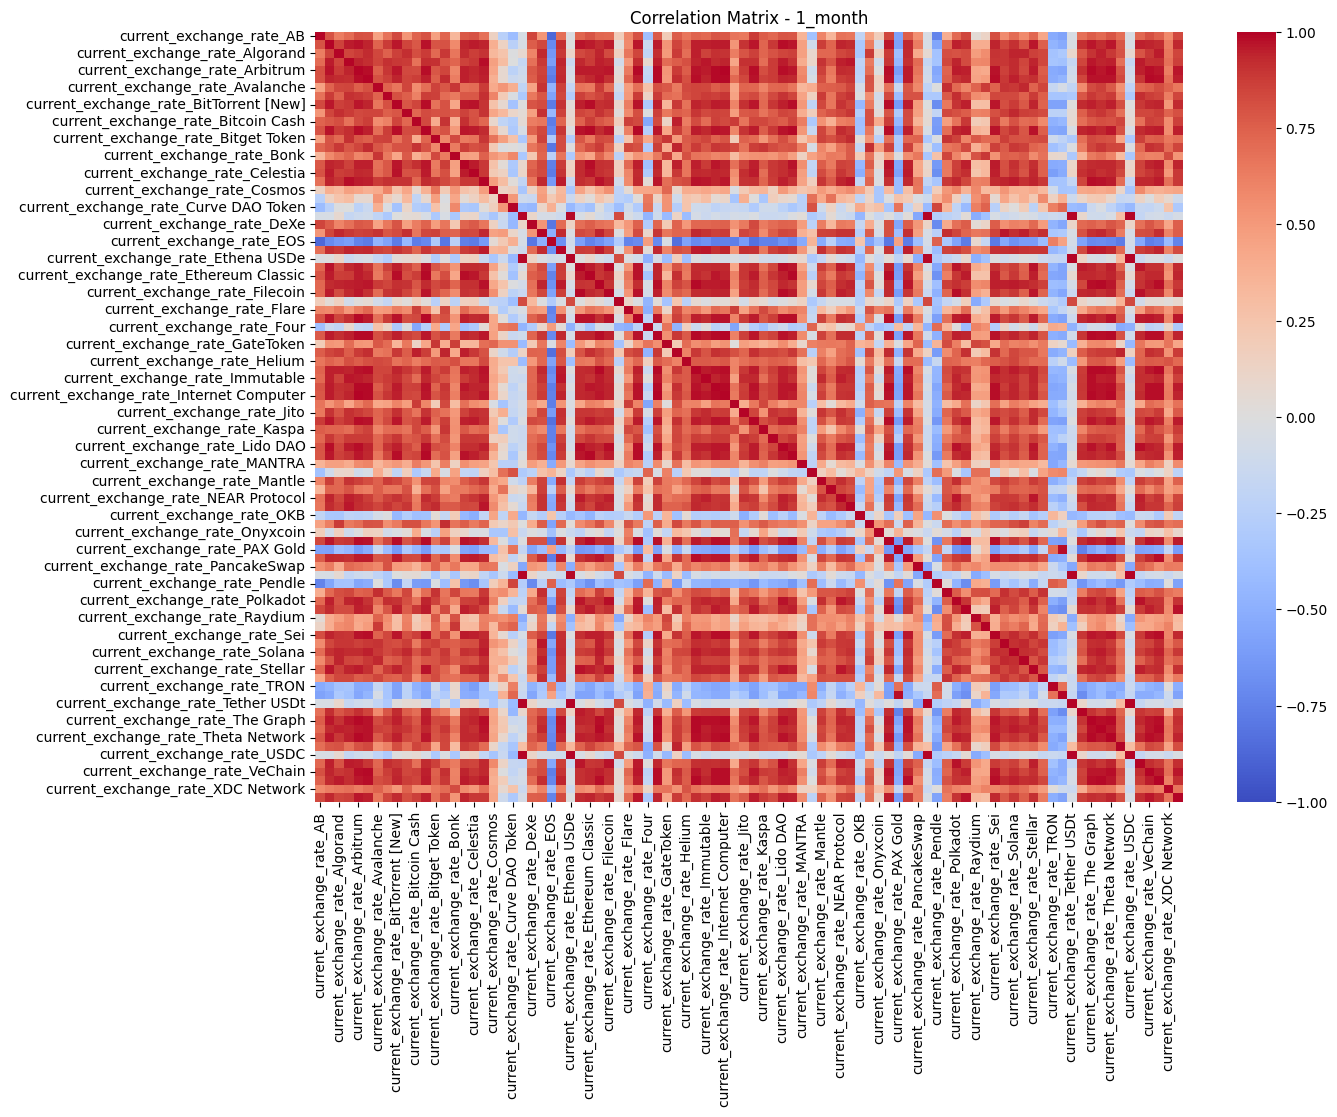


Валютные пары с высокой прямой корреляцией (значение ≥ 0.8):  1394
Для примера выведены первые 20 пар
current_exchange_rate_Dai ↔ current_exchange_rate_PayPal USD: корреляция = 1.00
current_exchange_rate_Tether USDt ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_PayPal USD ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_PayPal USD ↔ current_exchange_rate_Tether USDt: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_Tether USDt: корреляция = 1.00
current_exchange_rate_Ethena USDe ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_USDC: корреляция = 0.99
current_exchange_rate_Gala ↔ current_exchange_rate_Internet Computer: корреляция = 0.99
current_exchange_rate_Ethena USDe ↔ current_exchange_rate_Tether USDt: корреляция = 0.99
current_exchange_rate_Arbitrum ↔ current_exchange_rate_Internet Computer: корреляция = 0.99
current_exchange_rate_IOTA ↔ current_exchange_rate_The Sandb

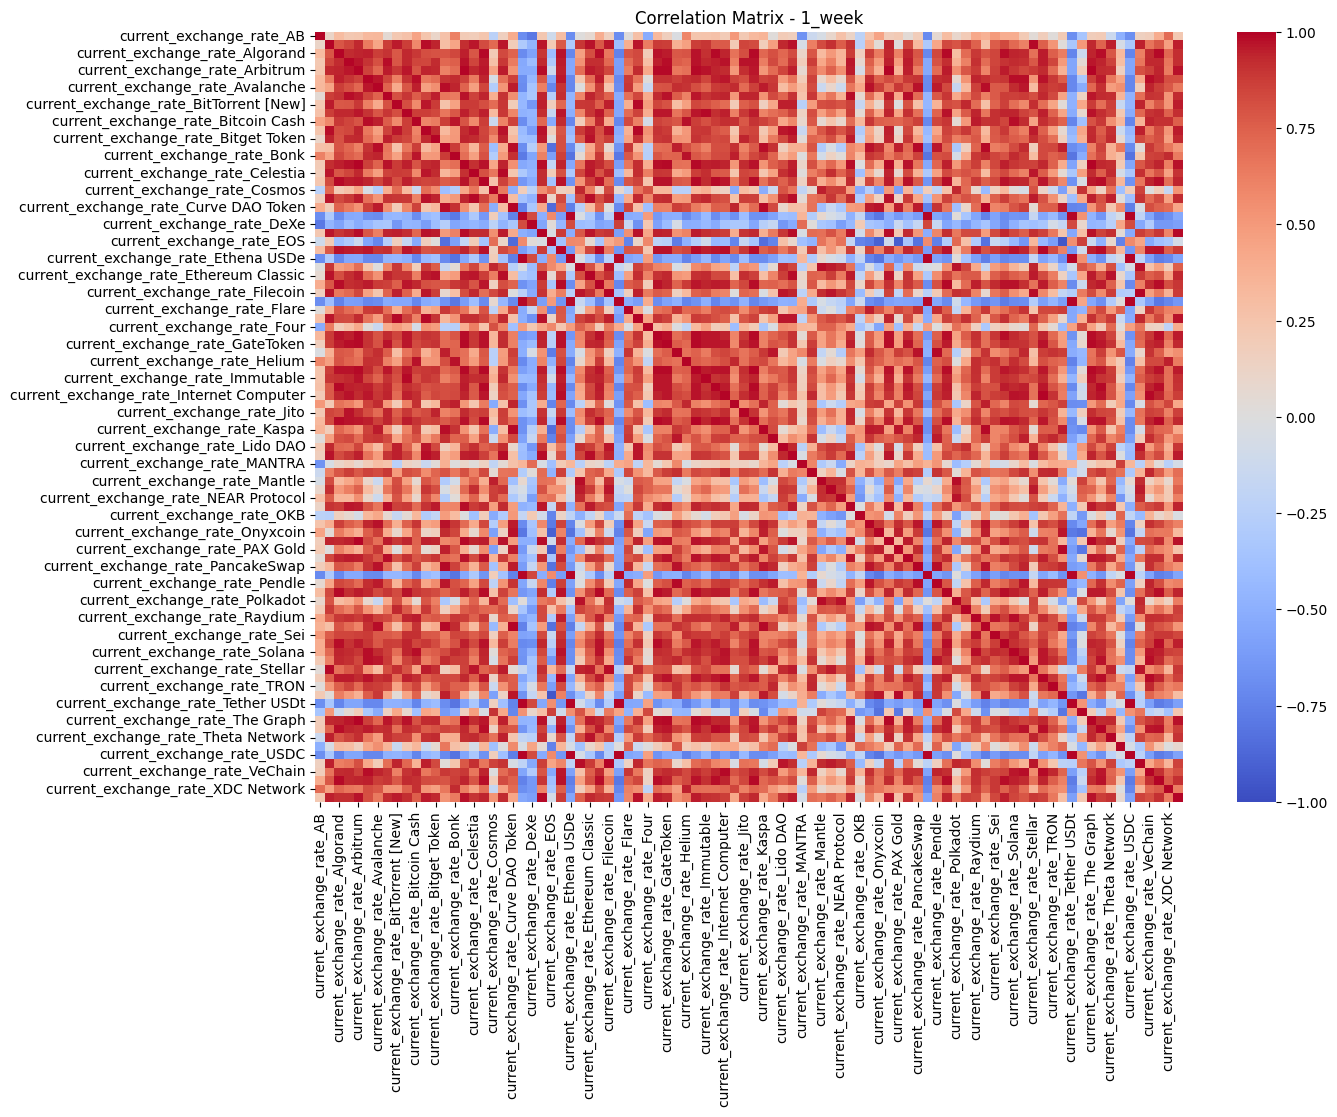


Валютные пары с высокой прямой корреляцией (значение ≥ 0.8):  1364
Для примера выведены первые 20 пар
current_exchange_rate_Ethena USDe ↔ current_exchange_rate_PayPal USD: корреляция = 1.00
current_exchange_rate_Ethena USDe ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_PayPal USD ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_Tether USDt ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_Ethena USDe: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_PayPal USD: корреляция = 1.00
current_exchange_rate_Dai ↔ current_exchange_rate_USDC: корреляция = 1.00
current_exchange_rate_PayPal USD ↔ current_exchange_rate_Tether USDt: корреляция = 1.00
current_exchange_rate_Ethena USDe ↔ current_exchange_rate_Tether USDt: корреляция = 1.00
current_exchange_rate_Internet Computer ↔ current_exchange_rate_Sui: корреляция = 1.00
current_exchange_rate_Filecoin ↔ current_exchange_rate_Uniswap: к

In [ ]:
high_corr_threshold = 0.8
high_negative_corr_threshold = -0.8

datasets = {}

for interval_name, (start, end) in intervals.items():
    datasets[interval_name] = df_pivot.loc[start:end]

for interval_name, data in datasets.items():
    print(f"\n=== Интервал: {interval_name} ===")

    corr_matrix = data.corr()

    # График матрицы корреляций
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix - {interval_name}')
    plt.show()

    high_positive_corr = []
    high_negative_corr = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            col_i = corr_matrix.columns[i]
            col_j = corr_matrix.columns[j]

            if corr_value >= high_corr_threshold:
                high_positive_corr.append((col_i, col_j, corr_value))
            elif corr_value <= high_negative_corr_threshold:
                high_negative_corr.append((col_i, col_j, corr_value))

    high_positive_corr.sort(key=lambda x: abs(x[2]), reverse=True)
    high_negative_corr.sort(key=lambda x: abs(x[2]), reverse=True)

    print("\nВалютные пары с высокой прямой корреляцией (значение ≥ 0.8): ", len(high_positive_corr))
    print("Для примера выведены первые 20 пар")
    if high_positive_corr:
        for pair in high_positive_corr[:20]:
            print(f"{pair[0]} ↔ {pair[1]}: корреляция = {pair[2]:.2f}")
    else:
        print("Нет валютных пар с высокой прямой корреляцией")

    print("\nВалютные пары с высокой обратной корреляцией (значение ≤ -0.8): ", len(high_negative_corr))
    print("Для примера выведены первые 20 пар")
    if high_negative_corr:
        for pair in high_negative_corr[:20]:
            print(f"{pair[0]} ↔ {pair[1]}: корреляция = {pair[2]:.2f}")
    else:
        print("Нет валютных пар с высокой обратной корреляцией")

## Методика оценки сбалансированности

Теперь необходимо разработать методику, с помощью которой будем оценивать степень сбалансированности портфеля.

Чем больше в портфеле валютных пар с высокой положительной корреляцией, тем менее сбалансированным является портфель, поскольку при падении одной валюты резко падают и другие. И наоборот, наличие низкой или отрицательной корреляции улучшает сбалансированность.

Для оценки сбалансированности можно применить следующую формулу:

$$
BalanceScore = 1 - \frac{\sum_{i,j, i\ne j}{w_i w_j C_{ij}}}{\sum_{i,j, i\ne j}{w_i w_j}}
$$
Где:

* w_i​,w_j​ — это доля (вес) каждой криптовалюты i и j в портфеле. Доли суммарно дают 1 (или 100%).
* C_ij​ — это коэффициент корреляции между парами криптовалют i и j.

Мы хотим получить показатель, отражающий, насколько наш портфель защищён от одновременного падения всех активов. Чем выше взаимная корреляция активов, тем хуже. Если активы коррелируют близко к +1, портфель не защищён от рисков — все активы будут расти и падать одновременно.

Числитель (∑wiwjCij​) показывает взвешенную сумму корреляций всех пар активов в портфеле. Мы перемножаем веса, чтобы учесть, что корреляция между важными (большими по весу) активами важнее, чем корреляция между второстепенными активами.

Знаменатель (∑wi​wj​) — это сумма всех возможных пар весов без корреляций. Он используется для нормализации, чтобы итоговая метрика лежала в понятном нам диапазоне.

Получившееся число вычитается из единицы, чтобы:
* BalanceScore≈0 означал, что портфель максимально несбалансирован (все активы сильно положительно коррелированы).
* BalanceScore≈1 означал умеренный баланс (корреляции в среднем близки к нулю).
* BalanceScore≈2 означал противоположную ситуацию (максимально сбалансированный портфель, активы сильно отрицательно коррелированы).

На практике идеально отрицательно коррелированных портфелей почти не бывает, так что реальный диапазон примерно от 0 до чуть выше 1.

Также применим дополнительные метрики, чтобы оценка сбалансированности была более точной:

1. Средняя корреляция (Average Correlation):

Среднее значение всех корреляций валют между собой. Чем ниже, тем лучше.

$$
\text{AverageCorrelation} = \frac{\sum_{i,j, i\ne j}{C_{ij}}}{N(N-1)}
$$

Где:

* Cij​ — корреляция между активами i и j.
* N — общее количество активов в портфеле.

Средняя корреляция показывает общее состояние взаимосвязей в портфеле. Высокое значение средней корреляции означает, что в среднем активы движутся в одном направлении, что увеличивает риск. Низкое значение средней корреляции говорит о том, что активы портфеля в среднем ведут себя независимо друг от друга, что снижает общий риск.

2. Средняя абсолютная корреляция (Mean Absolute Correlation):

$$
\text{MeanAbsoluteCorrelation} = \frac{\sum_{i,j, i\ne j}{|C_{ij}|}}{N(N-1)}
$$

Эта метрика учитывает не только положительные, но и отрицательные корреляции, взяв их по модулю. Она полезна, когда нас интересует просто сила взаимосвязи активов, без учёта направления (рост или падение). Чем ниже средняя абсолютная корреляция, тем лучше диверсифицирован портфель.

3. Максимальная корреляция (Max Correlation):

$$
\text{MaxCorrelation} = \max_{i,j, i \ne j}(C_{ij})
$$

Максимальная корреляция показывает наихудший сценарий среди всех пар активов. Даже одна пара с очень высокой корреляцией может сделать портфель крайне уязвимым. Чем ниже максимальная корреляция, тем меньше риск одновременного падения нескольких активов.

Теперь напишем функцию для расчета используемых метрик

In [ ]:
import numpy as np

In [ ]:
def calculate_portfolio_metrics(df, weights=None):
  '''
  Аргумент weights — это список или массив, определяющий долю каждой криптовалюты в портфеле.
  Если задать веса явно (например, [0.5, 0.3, 0.2] для трёх валют), то они будут использоваться при расчёте метрик, иначе будут взяты равные доли.
  '''

  if weights is None:
      weights = np.array([1/df.shape[1]] * df.shape[1])
  else:
      weights = np.array(weights)

  corr_matrix = df.corr().values

  numerator = 0
  denominator = 0
  N = len(weights)

  for i in range(N):
      for j in range(N):
          if i != j:
              numerator += weights[i] * weights[j] * corr_matrix[i, j]
              denominator += weights[i] * weights[j]

  balance_score = 1 - (numerator / denominator)
  avg_corr = (np.sum(corr_matrix) - N) / (N * (N - 1))
  mean_abs_corr = (np.sum(np.abs(corr_matrix)) - N) / (N * (N - 1))
  np.fill_diagonal(corr_matrix, 0)
  max_corr = np.max(corr_matrix)

  balance_score = float(round(balance_score, 4))
  avg_corr = float(round(avg_corr, 4))
  mean_abs_corr = float(round(mean_abs_corr, 4))
  max_corr = float(round(max_corr, 4))

  # Примерный вердикт на основе BalanceScore (диапазон метрики: 0 - 2)
  if balance_score >= 1.5:
      verdict = "Портфель высоко сбалансирован"
  elif balance_score >= 0.5:
      verdict = "Портфель умеренно сбалансирован"
  else:
      verdict = "Портфель несбалансирован"

  return {
        'BalanceScore': balance_score,
        'AverageCorrelation': avg_corr,
        'MeanAbsoluteCorrelation': mean_abs_corr,
        'MaxCorrelation': max_corr,
        'Verdict': verdict
    }


Перед демонстрацией работы функции необходимо разобраться, какой портфель активов считается сбалансированным, а какой нет.

* Сбалансированный портфель - содержит валюты с низкой или отрицательной корреляцией. То есть при падении цены одного актива, не факт, что упадет другой актив в портфеле.

* Несбалансированный портфель - содержит валюты с высокой положительной корреляцией. То есть при падении одного из активов, могут упасть в цене и остальные активы.

Для примера расчета возьмем два портфеля. Из анализа корреляций для явного примера положим в один портфель валюты с явно положительной корреляцией, а в другой - с отрицательной.

In [ ]:
# Пример двух портфелей:
balanced_portfolio = ['AB', 'Helium', 'Optimism']
unbalanced_portfolio = ['Tether USDt', 'USDC', 'Dai', 'First Digital USD', 'PayPal USD']

results = {}

for name, (start, end) in intervals.items():
    data_interval = df_pivot.loc[start:end]

    # Сбалансированный портфель
    balanced_data = data_interval[[f'current_exchange_rate_{coin}' for coin in balanced_portfolio]]
    balanced_metrics = calculate_portfolio_metrics(balanced_data)

    # Несбалансированный портфель
    unbalanced_data = data_interval[[f'current_exchange_rate_{coin}' for coin in unbalanced_portfolio]]
    unbalanced_metrics = calculate_portfolio_metrics(unbalanced_data)

    results[name] = {
        'BalancedPortfolio': {
            'Assets': balanced_portfolio,
            'Metrics': balanced_metrics
        },
        'UnbalancedPortfolio': {
            'Assets': unbalanced_portfolio,
            'Metrics': unbalanced_metrics
        }
    }

In [ ]:
for period, portfolios in results.items():
    print(f"\nПериод: {period}")
    for portfolio_type, details in portfolios.items():
        print(f"\n{portfolio_type}:")
        print("Криптовалюты:", details['Assets'])
        print("Метрики:", details['Metrics'])


Период: 1_year

BalancedPortfolio:
Криптовалюты: ['AB', 'Helium', 'Optimism']
Метрики: {'BalanceScore': 1.2522, 'AverageCorrelation': -0.2522, 'MeanAbsoluteCorrelation': 0.5733, 'MaxCorrelation': 0.4817, 'Verdict': 'Портфель умеренно сбалансирован'}

UnbalancedPortfolio:
Криптовалюты: ['Tether USDt', 'USDC', 'Dai', 'First Digital USD', 'PayPal USD']
Метрики: {'BalanceScore': 0.0004, 'AverageCorrelation': 0.9996, 'MeanAbsoluteCorrelation': 0.9996, 'MaxCorrelation': 0.9999, 'Verdict': 'Портфель несбалансирован'}

Период: 6_months

BalancedPortfolio:
Криптовалюты: ['AB', 'Helium', 'Optimism']
Метрики: {'BalanceScore': 1.264, 'AverageCorrelation': -0.264, 'MeanAbsoluteCorrelation': 0.8858, 'MaxCorrelation': 0.9327, 'Verdict': 'Портфель умеренно сбалансирован'}

UnbalancedPortfolio:
Криптовалюты: ['Tether USDt', 'USDC', 'Dai', 'First Digital USD', 'PayPal USD']
Метрики: {'BalanceScore': 0.0004, 'AverageCorrelation': 0.9996, 'MeanAbsoluteCorrelation': 0.9996, 'MaxCorrelation': 0.9999, 'Verd

Из метрик видно, что в сбалансированном портфеле на разных временных промежутках рисков меньше, чем во втором портфеле, в котором показатели метрик слишком низкие - однако, риски есть в обоих.

Также важно отметить, что в алгоритме прописан итоговый вердикт портфеля на основе BalanceScore. Его можно корректировать, но важно также смотреть и на остальные метрики при принятии решений по управлению активами

## Модель автоматической балансировки портфеля

Перед тем, как приступить к реализации алгоритма, важно пояснить, что именно подразумевается под автоматической балансировкой портфеля в контексте криптовалют.

* Автоматическая балансировка (rebalancing) — это процесс регулярного перераспределения активов в портфеле в соответствии с заранее установленными правилами или критериями. Обычно такие правила направлены на поддержание желаемого уровня риска и доходности. В нашем случае, целевым критерием является максимизация сбалансированности портфеля, выраженная в минимизации средней и максимальной корреляции между криптовалютами.

Криптовалютный рынок характеризуется высокой волатильностью и динамично меняющимися корреляциями между валютами. Поэтому портфель, изначально сбалансированный, со временем может стать несбалансированным (например, если две валюты внезапно начинают двигаться синхронно). Такую динамику мы могли наблюдать при построении матрицы корреляции на разных временных промежутках. Регулярная автоматическая балансировка помогает снизить риски одновременного падения активов.

Существует множество подходов к автоматической балансировке портфелей, например:
* Равновзвешенный (Equal-weighted) подход;
* Подход на основе минимизации риска (например, минимизации дисперсии или корреляций);
* Подходы на основе машинного обучения и оптимизации.

В данной задаче применим подход с использованием оптимизации и машинного обучения. Используем иерархическую кластеризацию (Hierarchical Risk Parity). Данный метод кластеризует активы по взаимной корреляции и распределяет веса таким образом, чтобы минимизировать общую корреляцию между группами активов.

HRP хорошо подходит для задачи, так как:
1. явно использует матрицу корреляций.
2. уменьшает веса высококоррелирующих активов.
3. улучшает диверсификацию портфеля, что снижает вероятность одновременного падения активов.

In [ ]:
from pypfopt import HRPOpt
import pandas as pd
import numpy as np

In [ ]:
df_pivot = pd.read_csv('df_pivot.csv', parse_dates=['timestamp'], index_col='timestamp')

# Расчёт дневной доходности активов
returns = df_pivot.pct_change().dropna()

def rebalance_portfolio_HRP(returns, frequency='M'):
    optimal_weights_history = {}
    metrics_history = {}

    for period, data in returns.resample(frequency):
        if len(data) < 2:
            continue

        hrp = HRPOpt(data)
        weights = hrp.optimize()
        optimal_weights_history[period] = weights

        selected_assets = [asset for asset, weight in weights.items() if weight > 0]
        selected_weights = np.array([weights[asset] for asset in selected_assets])

        portfolio_data = data[selected_assets]
        metrics = calculate_portfolio_metrics(portfolio_data, selected_weights)
        metrics_history[period] = metrics

    optimal_weights_df = pd.DataFrame(optimal_weights_history).T.fillna(0)
    metrics_df = pd.DataFrame(metrics_history).T

    return optimal_weights_df, metrics_df

Запускаем балансировку еженедельно (для примера)

In [ ]:
optimal_weights_hrp, metrics_hrp = rebalance_portfolio_HRP(returns, frequency='w')

<ipython-input-77-44642d440e30>:10: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  for period, data in returns.resample(frequency):


In [ ]:
print("Оптимальные веса после каждой балансировки:")
optimal_weights_hrp

Оптимальные веса после каждой балансировки:


,current_exchange_rate_AB,current_exchange_rate_Aave,current_exchange_rate_Algorand,current_exchange_rate_Aptos,current_exchange_rate_Arbitrum,current_exchange_rate_Artificial Superintelligence Alliance,current_exchange_rate_Avalanche,current_exchange_rate_BNB,current_exchange_rate_BitTorrent [New],current_exchange_rate_Bitcoin,...,current_exchange_rate_The Graph,current_exchange_rate_The Sandbox,current_exchange_rate_Theta Network,current_exchange_rate_UNUS SED LEO,current_exchange_rate_USDC,current_exchange_rate_Uniswap,current_exchange_rate_VeChain,current_exchange_rate_Worldcoin,current_exchange_rate_XDC Network,current_exchange_rate_XRP
2024-04-14,0.000630,1.978978e-07,2.298878e-07,7.554566e-08,3.953657e-08,9.513396e-08,1.461500e-08,1.136213e-07,8.015827e-08,1.874422e-07,...,6.512280e-11,2.452845e-11,2.026071e-11,7.430665e-09,0.035823,2.627705e-11,8.675516e-11,2.488899e-11,4.024288e-10,7.446689e-11
2024-04-21,0.001143,2.622146e-04,1.434693e-04,1.352635e-03,1.009661e-05,3.488618e-05,9.536252e-05,1.799336e-04,1.652025e-04,1.353606e-04,...,1.370397e-04,6.515579e-04,4.325112e-04,5.866860e-02,0.186786,3.338985e-04,6.825781e-06,1.898910e-05,2.781919e-03,1.106563e-03
2024-04-28,0.002527,3.993355e-04,3.823628e-04,1.323431e-04,2.798798e-04,2.318085e-04,1.438537e-04,1.497728e-03,1.052618e-03,1.021148e-03,...,2.035713e-04,5.422166e-04,1.988057e-03,7.063005e-02,0.192753,2.455036e-04,2.646928e-04,2.179152e-04,9.837150e-04,4.527410e-04
2024-05-05,0.000662,8.192683e-03,1.091683e-03,1.120691e-03,6.944381e-04,1.564305e-04,1.912917e-04,7.622867e-04,1.094508e-03,6.989283e-04,...,4.649825e-04,6.330984e-04,2.672079e-04,3.186188e-02,0.076458,4.585161e-03,3.906353e-04,2.797938e-04,2.089320e-03,3.590074e-03
2024-05-12,0.019262,1.523303e-03,1.072535e-03,1.050382e-03,9.390777e-04,9.196485e-04,7.927956e-04,3.050972e-03,4.242607e-03,2.722707e-03,...,3.620368e-04,2.349136e-03,2.247858e-03,1.424604e-01,0.104632,2.675344e-03,6.035993e-03,3.746603e-04,8.100982e-02,3.401434e-03
2024-05-19,0.002289,5.297792e-04,1.524493e-04,1.096492e-04,3.027877e-04,4.487762e-05,2.226435e-04,1.085526e-03,1.573611e-03,1.632748e-03,...,1.214049e-04,1.325159e-04,1.259815e-04,3.147759e-02,0.123030,1.649227e-04,2.839384e-04,8.859412e-05,6.546112e-03,1.873174e-03
2024-05-26,0.000791,1.584626e-03,8.917220e-04,6.176923e-04,3.685056e-04,1.018955e-03,1.845240e-04,1.587190e-03,1.532167e-03,7.279409e-04,...,1.880922e-04,1.935445e-03,1.207265e-04,1.718995e-01,0.043879,3.829426e-04,7.486087e-04,2.523478e-04,2.392131e-02,3.435734e-03
2024-06-02,0.000520,1.077453e-03,1.335571e-02,1.528232e-03,3.266490e-03,6.690165e-03,1.553327e-02,4.121335e-02,6.662436e-03,1.013725e-02,...,4.132398e-03,1.164189e-02,1.164959e-02,3.473763e-02,0.008196,2.559526e-02,3.719512e-02,9.186601e-04,2.321894e-03,8.349466e-02
2024-06-09,0.039128,1.226888e-03,8.553525e-04,1.116571e-03,9.842936e-04,4.478211e-04,1.001924e-03,1.347379e-03,3.766489e-03,7.062969e-03,...,1.138149e-03,8.751312e-04,2.474037e-04,3.916308e-02,0.150474,2.734390e-04,3.777674e-04,7.809887e-04,3.002357e-03,2.553570e-03
2024-06-16,0.001453,3.146423e-04,8.690287e-04,3.552250e-04,8.963907e-04,3.518001e-04,7.576578e-04,1.874488e-03,9.923410e-04,2.381731e-03,...,2.291983e-04,9.398838e-04,1.856889e-04,1.850660e-03,0.015991,1.961401e-04,3.034846e-04,4.108583e-04,2.179421e-01,1.060935e-03


Проверка суммы долей

In [ ]:
optimal_weights_hrp.T['2024-04-14'].sum(), optimal_weights_hrp.sum().sum()

(np.float64(1.0000000000000002), np.float64(53.0))

Алгоритм работает с долями успешно, так как сумма всех долей каждой валюты должна быть практически равна числу полученных строк. Сумма долей для каждой даты не может превосходить единицу.

После работы алгоритма балансировки можно проверить его результаты через ранее созданные метрики сбалансированности. Напомню, что вердикты BalanceScore были установлены произвольно в испытательных целях, их можно корректировать.

In [ ]:
print("\nМетрики сбалансированности после каждой балансировки:")
metrics_hrp


Метрики сбалансированности после каждой балансировки:


,BalanceScore,AverageCorrelation,MeanAbsoluteCorrelation,MaxCorrelation,Verdict
2024-04-14,1.8338,0.7483,1.0,1.0,Портфель высоко сбалансирован
2024-04-21,0.3354,0.4244,0.5874,0.9963,Портфель несбалансирован
2024-04-28,0.3965,0.3576,0.4843,0.997,Портфель несбалансирован
2024-05-05,0.5049,0.419,0.5852,0.9931,Портфель умеренно сбалансирован
2024-05-12,0.7056,0.4245,0.507,0.9961,Портфель умеренно сбалансирован
2024-05-19,0.3578,0.5874,0.6199,0.9971,Портфель несбалансирован
2024-05-26,0.535,0.4538,0.5756,0.9979,Портфель умеренно сбалансирован
2024-06-02,0.803,0.1716,0.3667,0.9975,Портфель умеренно сбалансирован
2024-06-09,0.5176,0.5258,0.5733,0.9992,Портфель умеренно сбалансирован
2024-06-16,0.9263,0.569,0.5933,0.9988,Портфель умеренно сбалансирован


In [ ]:
metrics_hrp['Verdict'].value_counts()

,count
Verdict,
Портфель умеренно сбалансирован,30
Портфель несбалансирован,22
Портфель высоко сбалансирован,1


## Выводы

Базовая версия алгоритма неплохо себя показала. В итоговом порядке балансировки положительные исходы встречаются чаще негативных. Однако, для улучшения работы алгоритма необходимы определенные доработки:

1. Необходимо больше данных: а именно больше исторический данных (больше, чем за один год), а также больше исследуемых валют (на бирже их количество достаточно большое, но для эксперимента было взято примерно 100 разных монет с первой страницы топа). Так, имея больше данных, можно найти больше скрытых зависимостей и больше пар корреляции между курсами валют.
2. Использование большего числа метрик: в рамках проекта было разработано и использовано не так много основных метрик, по которым можно оценить сбалансированность портфеля. Если использовать больше экономических данных о валюте и, как следствие, более вариативные метрики риска на основе этих данных, то можно построить более точную оценку сбалансированности.
3. Оценка сбалансированности: важно отметить, что в ходе эксперимента был задан конкретный диапазон оценки сбалансированности (на основе BalanceScore), по которому выносился итоговый вердикт состояния портфеля активов. Данное решение не является эталонным и зависит от нужд и потребностей бизнеса - следовательно, может устанавливаться самостоятельно и может иметь другие границы оценок. Также было бы неплохо при выставлении вердикта учитывать все метрики, а не одну, распределяя каждой метрике веса по степени важности. Однако, эти веса также должны выставляться и быть динамическими в зависимости от потребностей организации, а также от состояния рынка криповалют
4. При практической реализации важно учесть, что за обменные операции удерживается комиссия. Важно, чтобы предполагаемый эффект от ребалансировки покрывал затраты на обменные операции.

## Сохранение отчета в читаемый формат

In [1]:
!jupyter nbconvert --to html /content/Практика_крипта.ipynb

[NbConvertApp] Converting notebook /content/Практика_крипта.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 2730371 bytes to /content/Практика_крипта.html
